#Is the HIV aids epidemic rising or declining

In [301]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import requests
import time
from scipy.stats import linregress
import requests
import json
from pprint import pprint
import time
from datetime import datetime


In [286]:
aids= 'persons-living-with-hiv-aids-2011-2017.csv'
aids = pd.read_csv(aids)
f = lambda x: (int(x.replace (',','') ))
death = pd.read_csv ('AIDSdeathperstate.csv', converters = {'Cases': f})
pd.set_option('display.max_rows', 357)
death

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Transmission Category,Cases,Rate per 100000,Population
0,AIDS deaths,2011,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,183,4.6,3997493.0
1,AIDS deaths,2012,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,202,5.0,4019335.0
2,AIDS deaths,2013,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,187,4.6,4041871.0
3,AIDS deaths,2014,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,210,5.2,4059211.0
4,AIDS deaths,2015,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,210,5.2,4070748.0
5,AIDS deaths,2016,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,199,4.9,4082972.0
6,AIDS deaths,2017,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,184,4.5,4094777.0
7,AIDS deaths,2011,Alaska,2,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,9,1.5,584567.0
8,AIDS deaths,2012,Alaska,2,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,8,1.3,592771.0
9,AIDS deaths,2013,Alaska,2,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,13,2.2,599385.0


In [284]:
aids1 = pd.DataFrame(aids)
aids1 = aids1.dropna(how='any')
aids1

,Year,Category,Group,Count
0,2011.0,Age at Year End,0-11,169.0
1,2011.0,Age at Year End,12-14,87.0
2,2011.0,Age at Year End,15-17,180.0
3,2011.0,Age at Year End,18-19,315.0
4,2011.0,Age at Year End,20-24,2971.0
...,...,...,...,...
310,2017.0,Transmission Category: Female Adult or Adolescent,Unknown risk,994.0
311,2017.0,Transmission Category: Female Adult or Adolescent,Other****,136.0
312,2017.0,Transmission Category: Child (<12 Years Old at...,Perinatal,92.0
313,2017.0,Transmission Category: Child (<12 Years Old at...,Unknown risk,16.0


In [148]:
age_year_end = aids1[aids1["Category"]=='Age at Year End']
new_df = pd.DataFrame()
for name in age_year_end['Group'].unique():
    age_groups = age_year_end.loc[age_year_end ["Group"] == name, :]
    mon = age_groups["Count"].mean()
    new_df = new_df.append(pd.Series({"Group":name, 'Mean':mon}),ignore_index =True)
new_df

,Group,Mean
0,0-11,143.428571
1,12-14,77.142857
2,15-17,134.857143
3,18-19,270.714286
4,20-24,3030.571429
5,25-29,7238.000000
6,30-34,9869.428571
7,35-39,11407.000000
8,40-44,15013.571429
9,45-49,20976.285714


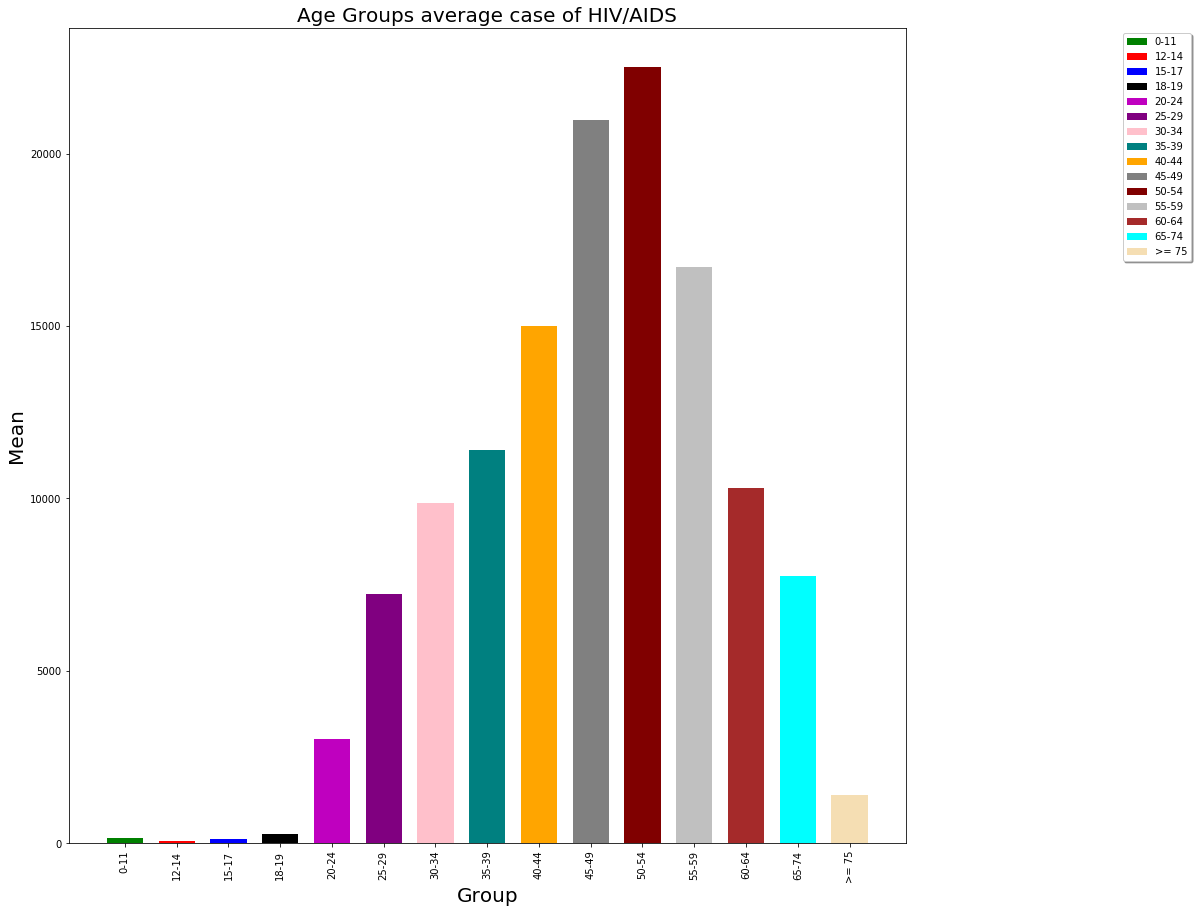

In [149]:
#bar chart per year

plt.figure(figsize=[15,15]);
x_axis = new_df ["Group"].unique()
y_axis = new_df ["Mean"].unique()
tick_locations = [value for value in x_axis]                   
tp = plt.bar(x_axis, y_axis, color=("g", "r","b","black", "m", "purple", "pink", "teal",
                                    "orange","grey","maroon","silver", "brown", "cyan", "wheat"), align="center", width =.7);

plt.xticks(tick_locations, new_df ["Group"].unique() , rotation = 'vertical')
plt.xlabel('Group',  fontsize=20)
plt.ylabel('Mean',  fontsize=20)
plt.title("Age Groups average case of HIV/AIDS", fontsize=20)
plt.legend( tp,x_axis,loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(1.30, 1.0))

plt.savefig('Age_Groups_average_case_of_HIV(AIDS).png', bbox_inches = 'tight');
plt.show();

In [150]:
#what are the counts between 2011 to 2017
years = aids1[aids1["Year"].isin ([2011,2012, 2013, 2014, 2015, 2016, 2017])]
new_df1 = pd.DataFrame()
for name in years['Year'].unique():
    age_groups = years.loc[years ["Year"] == name, :]
    mon1 = age_groups["Count"].sum()
    new_df1 = new_df1.append(pd.Series({"Year":name, 'Sum':mon1}),ignore_index =True)
new_df1

,Sum,Year
0,473948.0,2011.0
1,486348.0,2012.0
2,496940.0,2013.0
3,505504.0,2014.0
4,517264.0,2015.0
5,531632.0,2016.0
6,540328.0,2017.0


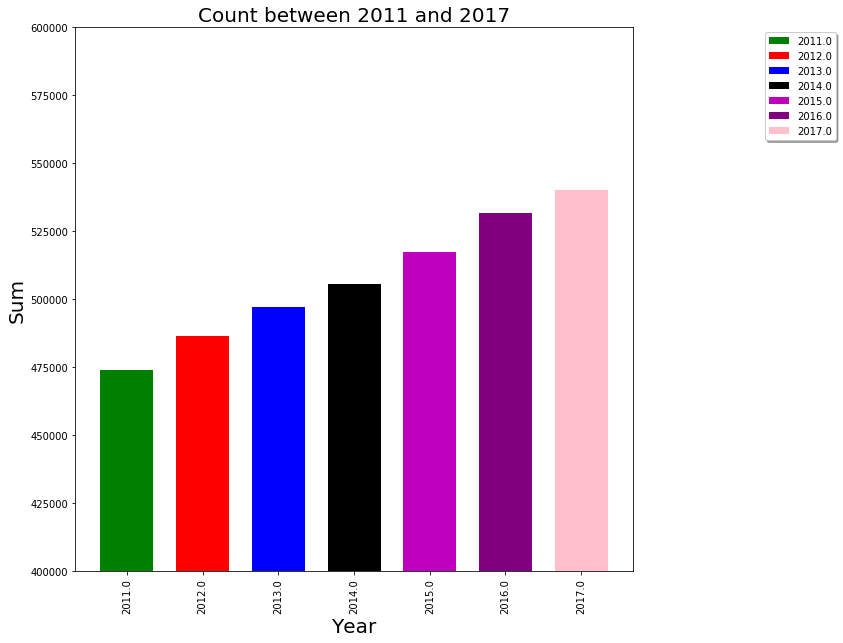

In [151]:
#bar chart per year
plt.figure(figsize=[10,10])
x_axis = new_df1 ["Year"].unique()
y_axis = new_df1 ["Sum"].unique()
tick_locations = [value for value in x_axis]  
mp = plt.bar(x_axis, y_axis, color=("g", "r","b","black", "m", "purple", "pink"), align="center", width =.7)
plt.xticks(tick_locations, new_df1 ["Year"].unique() , rotation = 'vertical')
plt.xlabel('Year',  fontsize=20)
plt.ylabel('Sum',  fontsize=20)
plt.ylim(400000, 600000)
plt.title("Count between 2011 and 2017", fontsize=20)
plt.legend(mp,x_axis,loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(1.30, 1.0))

plt.savefig('YearCount.png', bbox_inches = 'tight')
plt.show()

In [152]:
y_axis

array([473948., 486348., 496940., 505504., 517264., 531632., 540328.])

In [153]:
#what are the reasons for contraction? 
contractions = aids1[aids1["Group"].isin (["Male-to-male sexual contact (MMSC)",
                                              "Injection drug use (IDU)",
                                              "MMSC and IDU",
                                          "High-risk heterosexual contact (HRH)**",
                                          "Heterosexual contact (Non-HRH)***",
                                          "Perinatal",
                                          "Unknown risk",
                                          "Other****"
                                          ])]
new_df2 = pd.DataFrame()
for name in contractions['Group'].unique():
    cat = years.loc[years ["Group"] == name, :]
    mon2 = cat["Count"].mean()
    new_df2 = new_df2.append(pd.Series({"Type":name, 'Mean':mon2}),ignore_index =True)

#new_df2 ["Mean"] = new_df2 ["Mean"].map("{:.0f}".format)
new_df2

,Mean,Type
0,85485.571429,Male-to-male sexual contact (MMSC)
1,4088.928571,Injection drug use (IDU)
2,9657.571429,MMSC and IDU
3,5649.071429,High-risk heterosexual contact (HRH)**
4,3270.142857,Heterosexual contact (Non-HRH)***
5,242.333333,Perinatal
6,1519.857143,Unknown risk
7,135.850000,Other****


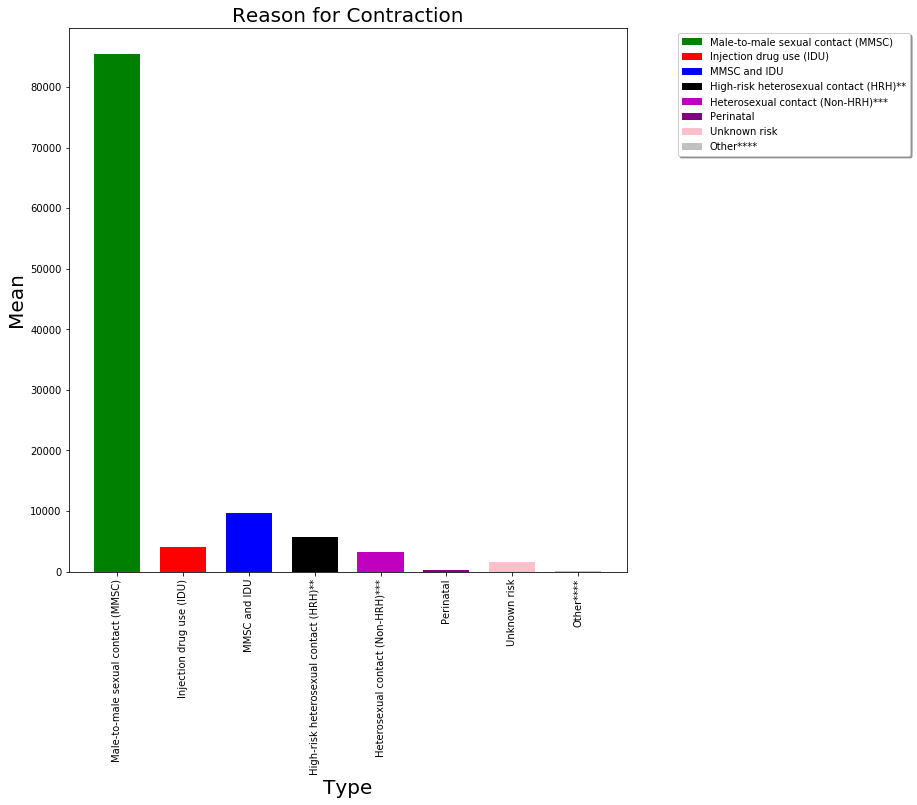

In [154]:
#bar charts
plt.figure(figsize=[10,10])
x_axis = new_df2 ["Type"].unique()
y_axis = new_df2 ["Mean"].unique()
tick_locations = [value for value in x_axis]                   
sp = plt.bar(x_axis, y_axis, color=("g", "r","b","black", "m", "purple", "pink", "silver"), align="center", width =.7)

plt.xticks(tick_locations, new_df2 ["Type"].unique() , rotation = 'vertical')
plt.xlabel('Type',  fontsize=20)
plt.ylabel('Mean',  fontsize=20)
plt.title("Reason for Contraction", fontsize=20)
plt.legend( sp,x_axis,loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(1.30, 1.0))
plt.savefig('Reasonforcontraction.png', bbox_inches = 'tight')
plt.show()

In [155]:
#what race/ethnicity is affected the most

In [156]:
#pie chart

In [157]:
#what gender is mostly affected?
contractions1 = aids1[aids1["Group"].isin (["Cisgender men",
                                              "Cisgender women",
                                              "Transgender women",
                                          "Transgender men",
                                          "Alternative Gender"
                                          ])]
new_df5 = pd.DataFrame()
for name in contractions1['Group'].unique():
    cat1 = years.loc[years ["Group"] == name, :]
    mon5 = cat1["Count"].mean()
    new_df5 = new_df5.append(pd.Series({"Type":name, 'Mean':mon5}),ignore_index =True)
new_df5

,Mean,Type
0,110239.000000,Cisgender men
1,14914.857143,Cisgender women
2,1655.857143,Transgender women
3,41.428571,Transgender men
4,4.714286,Alternative Gender


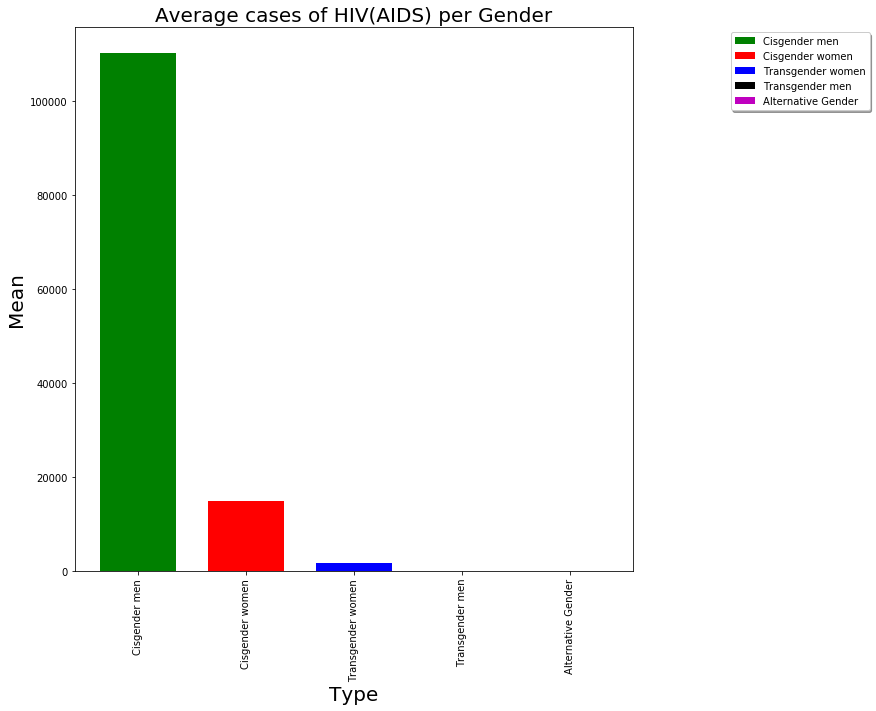

In [158]:
#bar charts
plt.figure(figsize=[10,10])
x_axis = new_df5 ["Type"].unique()
y_axis = new_df5 ["Mean"].unique()
tick_locations = [value for value in x_axis]                   
pp = plt.bar(x_axis, y_axis, color=("g", "r","b","black", "m", "purple", "pink", "silver"), align="center", width =.7)

plt.xticks(tick_locations, new_df5 ["Type"].unique() , rotation = 'vertical')
plt.xlabel('Type',  fontsize=20)
plt.ylabel('Mean',  fontsize=20)
plt.title("Average cases of HIV(AIDS) per Gender", fontsize=20)
plt.legend( pp,x_axis,loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(1.30, 1.0))
plt.savefig('gendercases.png', bbox_inches = 'tight')
plt.show()

In [169]:
#quartiles need a series- to make a series add the column title after your DataFrame
quartiles = new_df5['Mean'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of tumor volumes is: 41.42857142857143
The upper quartile of tumor volumes is: 14914.857142857143
The interquartile range of tumor volumes is: 14873.428571428572
The the median of tumor volumes is: 1655.857142857143 
Values below -22268.714285714286 could be outliers.
Values above 37225.0 could be outliers.


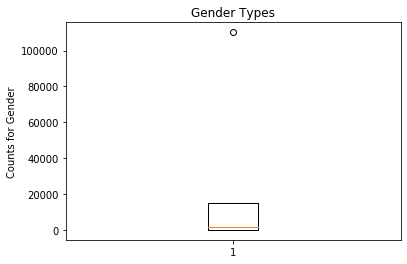

In [172]:
ig1, ax1 = plt.subplots()
ax1.set_title('Gender Types')
ax1.set_ylabel('Counts for Gender')
#boxplot takes a series- meaning final_tv is a dataframe, but I had to add the column name to make it a series
ax1.boxplot(new_df5['Mean'])
plt.savefig('gendercasesscatter.png', bbox_inches = 'tight')
plt.show()

In [160]:
#pie chart
startyearg = pd.DataFrame(contractions1)
s1 = startyearg[startyearg ["Year"]==2011.0]
s2 = startyearg[startyearg ["Year"]==2017.0]

In [161]:
startyearg = pd.DataFrame(contractions1)
s1 = startyearg[startyearg ["Year"]==2011.0]
s2 = startyearg[startyearg ["Year"]==2017.0]

In [162]:
s1

,Year,Category,Group,Count
15,2011.0,Current Gender,Cisgender men,102868.0
16,2011.0,Current Gender,Cisgender women,14064.0
17,2011.0,Current Gender,Transgender women,1515.0
18,2011.0,Current Gender,Transgender men,35.0
19,2011.0,Current Gender,Alternative Gender,5.0


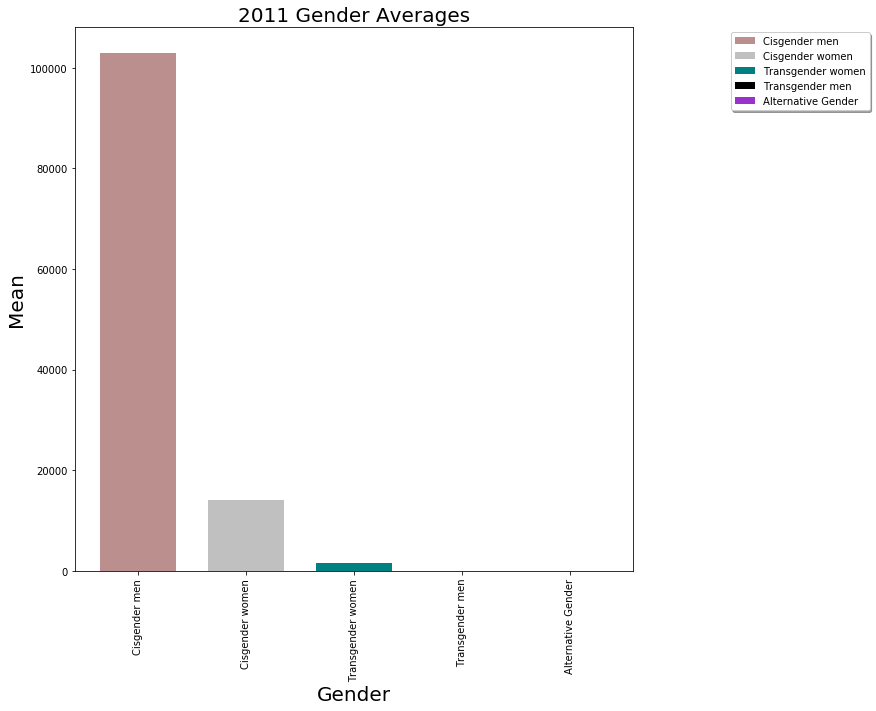

In [163]:
plt.figure(figsize=[10,10])
x_axis = s1 ["Group"].unique()
y_axis = s1 ["Count"].unique()
tick_locations = [value for value in x_axis]                   
gp11 = plt.bar(x_axis, y_axis, color=("rosybrown", "silver","teal","black", "darkorchid"), align="center", width =.7)

plt.xticks(tick_locations, s1 ["Group"].unique() , rotation = 'vertical')
plt.xlabel('Gender',  fontsize=20)
plt.ylabel('Mean',  fontsize=20)
plt.title("2011 Gender Averages", fontsize=20)
plt.legend( gp11,x_axis,loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(1.30, 1.0))
plt.savefig('gendercases2011.png', bbox_inches = 'tight')
plt.show()

In [164]:
s2

,Year,Category,Group,Count
285,2017.0,Current Gender,Cisgender men,117421.0
286,2017.0,Current Gender,Cisgender women,15813.0
287,2017.0,Current Gender,Transgender women,1790.0
288,2017.0,Current Gender,Transgender men,53.0
289,2017.0,Current Gender,Alternative Gender,5.0


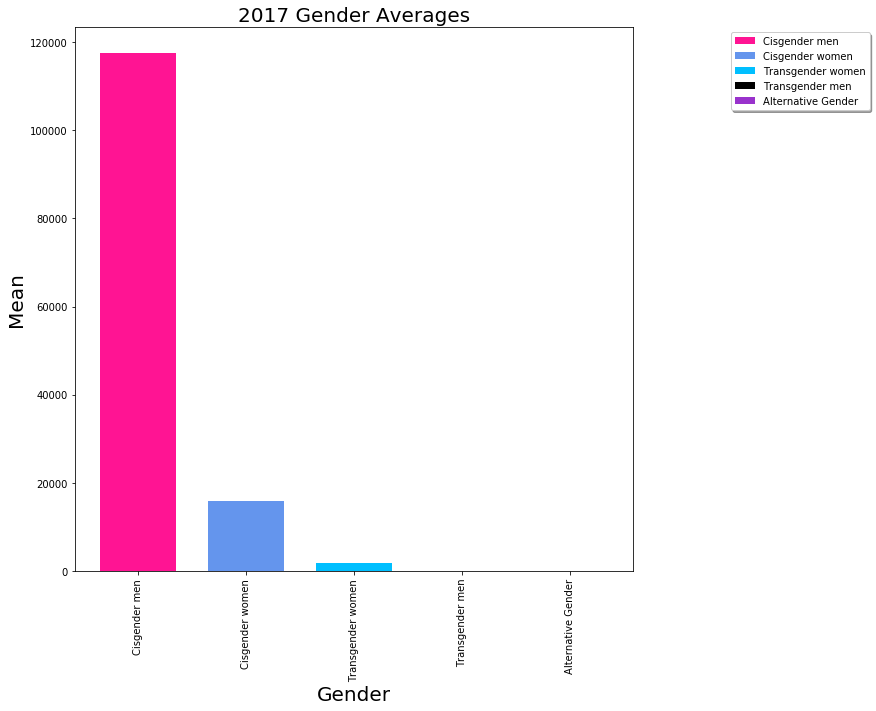

In [165]:
plt.figure(figsize=[10,10])
x_axis = s2 ["Group"].unique()
y_axis = s2 ["Count"].unique()
tick_locations = [value for value in x_axis]                   
qp11 = plt.bar(x_axis, y_axis, color=("deeppink", "cornflowerblue","deepskyblue","black", "darkorchid"), align="center", width =.7)

plt.xticks(tick_locations, s2 ["Group"].unique() , rotation = 'vertical')
plt.xlabel('Gender',  fontsize=20)
plt.ylabel('Mean',  fontsize=20)
plt.title("2017 Gender Averages", fontsize=20)
plt.legend( qp11,x_axis,loc='upper center', fancybox=True, shadow=True, bbox_to_anchor=(1.30, 1.0))
plt.savefig('gendercases2017.png', bbox_inches = 'tight')
plt.show()

In [278]:
#what state has the highest death rate per year
death

,Indicator,Year,Geography,FIPS,Age Group,Race/Ethnicity,Sex,Transmission Category,Cases,Rate per 100000,Population
0,AIDS deaths,2011,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,183,4.6,3997493.0
1,AIDS deaths,2012,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,202,5.0,4019335.0
2,AIDS deaths,2013,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,187,4.6,4041871.0
3,AIDS deaths,2014,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,210,5.2,4059211.0
4,AIDS deaths,2015,Alabama,1,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,210,5.2,4070748.0
...,...,...,...,...,...,...,...,...,...,...,...
352,AIDS deaths,2013,Wyoming,56,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,6,1.2,480996.0
353,AIDS deaths,2014,Wyoming,56,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,5,1.0,480901.0
354,AIDS deaths,2015,Wyoming,56,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,1,0.2,483034.0
355,AIDS deaths,2016,Wyoming,56,Ages 13 years and older,All races/ethnicities,Both sexes,All transmission categories,4,0.8,482500.0


,Year,Geography,Cases,Population
0,2011,Alabama,183,3997493.0
1,2012,Alabama,202,4019335.0
2,2013,Alabama,187,4041871.0
3,2014,Alabama,210,4059211.0
4,2015,Alabama,210,4070748.0
...,...,...,...,...
352,2013,Wyoming,6,480996.0
353,2014,Wyoming,5,480901.0
354,2015,Wyoming,1,483034.0
355,2016,Wyoming,4,482500.0


In [328]:
firsty1 = death.loc[death ["Year"]==2011, :]

firsty2 = death.loc[death ["Year"]==2017, :]


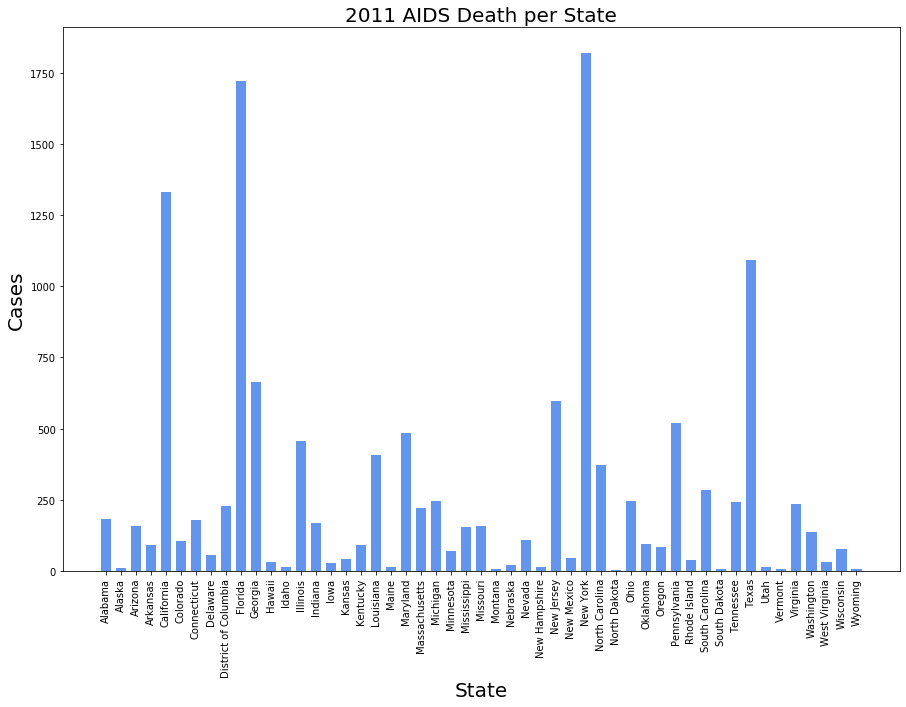

In [332]:
plt.figure(figsize=[15,10])

x_axis = firsty1 ["Geography"]

y_axis = firsty1 ["Cases"]

tick_locations = [value for value in x_axis]                   
qp11 = plt.bar(x_axis, y_axis, color=( "cornflowerblue"), align="center", width =.7)
plt.xticks(tick_locations, firsty1 ["Geography"] , rotation = 'vertical')
plt.xlabel('State',  fontsize=20)
plt.ylabel('Cases',  fontsize=20)
plt.title("2011 AIDS Death per State", fontsize=20)
plt.savefig('aidscases2011.png', bbox_inches = 'tight')
plt.show()


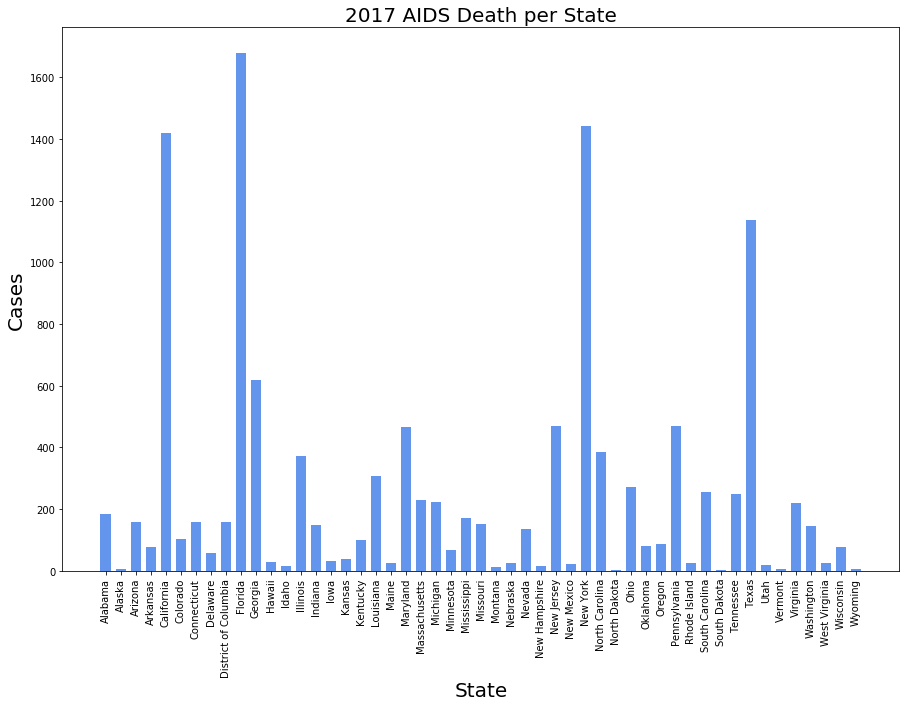

In [334]:
plt.figure(figsize=[15,10])

x_axis = firsty2 ["Geography"]

y_axis = firsty2 ["Cases"]

tick_locations = [value for value in x_axis]                   
qp11 = plt.bar(x_axis, y_axis, color=( "cornflowerblue"), align="center", width =.7)
plt.xticks(tick_locations, firsty2 ["Geography"] , rotation = 'vertical')
plt.xlabel('State',  fontsize=20)
plt.ylabel('Cases',  fontsize=20)
plt.title("2017 AIDS Death per State", fontsize=20)
plt.savefig('aidscases2017.png', bbox_inches = 'tight')
plt.show()

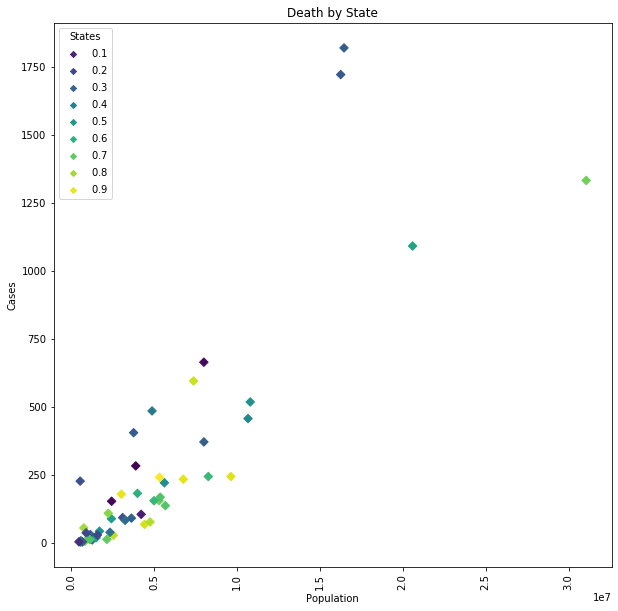

In [323]:
#scatterplot state population vs. aids death per year
plt.figure(figsize=[10,10])
colors = np.random.rand(51)
scatter = plt.scatter(firsty["Population"],firsty["Cases"], c=colors, marker = "D")
plt.xticks( rotation=90)
plt.xlabel('Population')
plt.ylabel('Cases')
plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="States")
plt.title("Death by State")
plt.show()